In [2]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

from slice_ojh import split_stock, split_mm
from sklearn.model_selection import train_test_split, TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [38]:
x = np.load('x_data.npy', allow_pickle = 'True')
y = np.load('y_data.npy', allow_pickle = 'True')

In [43]:
features=x[20:]
labels=y[20:]

In [14]:
# data preprocess
def prepro(data, method):
    if method == 'minmax':
        scaler = MinMaxScaler()
        x = data.reshape(-1,1)
        scaler.fit(x)
        tmp = scaler.transform(x)
        return np.squeeze(tmp, axis=1)
    
    if method == 'stand':
        scaler = StandardScaler()
        x = data.reshape(-1,1)
        scaler.fit(x)
        tmp = scaler.transform(x)
        return np.squeeze(tmp, axis=1)
    
    if method == 'robust':
        scaler = RobustScaler()
        x = data.reshape(-1,1)
        scaler.fit(x)
        tmp = scaler.transform(x)
        return np.squeeze(tmp, axis=1)

In [15]:
x_minmax = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_minmax[:,i] = prepro(x[:,i], 'minmax')

x_stand = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_stand[:,i] = prepro(x[:,i], 'stand')

x_robust = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_robust[:,i] = prepro(x[:,i], 'robust')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_robust, x_robust[:,3], test_size=0.1, shuffle=False)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(522, 6) (522,)
(58, 6) (58,)


In [24]:
# RandomForest
def rf_model(data, label):
    rf = RandomForestRegressor(n_estimators=100, criterion='mse', 
                               max_depth=None, random_state=3, 
                               min_samples_leaf=1, min_samples_split=2, 
                               min_impurity_split=None)
    rf_fit = rf.fit(data, label)
    #print(rf.feature_importances_)
    Importance = pd.DataFrame({'Importance':rf.feature_importances_*100},
                              index=['market','high','low','close','volume','ratio'])
    plt.rc('font', size=8)
    Importance.sort_values(by='Importance', axis=0,
                           ascending=True).plot(kind='barh', color='r')
    plt.title('Random forest')
    plt.xlabel('Feature importance')
    
# AdaBoost
def adabst_model(data, label):
    adabst = AdaBoostRegressor(base_estimator=None, n_estimators=100, 
                               learning_rate=1.0, loss='linear', 
                               random_state=3)
    adabst_fit = adabst.fit(data, label)
    #print(adabst.feature_importances_)
    Importance = pd.DataFrame({'Importance':adabst.feature_importances_*100}, 
                              index=['market','high','low','close','volume','ratio'])
    plt.rc('font', size=8)
    Importance.sort_values(by='Importance', axis=0,
                           ascending=True).plot(kind='barh', color='r')
    plt.title('Adaboost')
    plt.xlabel('Feature importance')
    
# Xgboost
def xgb_model(data, label):
    xgb = XGBRegressor(n_estimators=100, random_state=3)
    xgb_fit = xgb.fit(data, label)
    #print(xgb.feature_importances_)
    Importance = pd.DataFrame({'Importance':xgb.feature_importances_*100},
                              index=['market','high','low','close','volume','ratio'])
    Importance.sort_values(by='Importance', axis=0, 
                           ascending=True).plot(kind='barh', color='r')
    plt.title('Xgboost')
    plt.xlabel('Feature importance')
    plt.rc('font', size=8)
    
# lightGBM
def lgbm_model(data, label):
    lgbm = LGBMRegressor(n_estimators=100, random_state=3)
    lgbm_fit = lgbm.fit(data, label)
    #print(lgbm.feature_importances_)
    Importance = pd.DataFrame({'Importance':lgbm.feature_importances_},
                              index=['market','high','low','close','volume','ratio'])
    plt.rc('font', size=8)
    Importance.sort_values(by='Importance', axis=0, 
                           ascending=True).plot(kind='barh', color='r')
    plt.title('LightGBM')
    plt.xlabel('Feature importance')

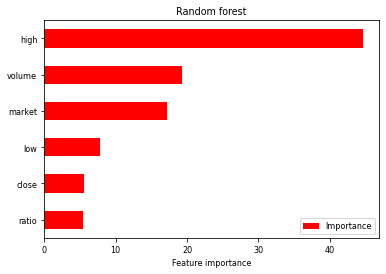

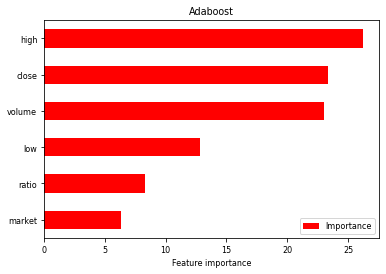

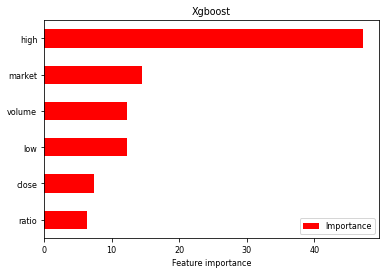

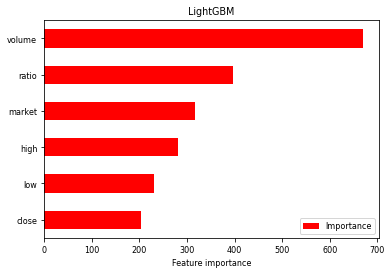

In [44]:
rf_model(features, labels)
adabst_model(features, labels)
xgb_model(features, labels)
lgbm_model(features, labels)

In [47]:
# PCA
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

n = np.argmax(cumsum >= 0.95) + 1
print(n)

def pca_(data, n):
    pca = PCA(n_components=n)
    x = data.copy()
    w = pca.fit_transform(x)
    return w

[0.99999861 1.         1.         1.         1.         1.        ]
1


In [48]:
pca_data = pca_(x, 2)
pca_data.shape

(580, 2)

In [49]:
pca_data

array([[ 2.50118111e+07, -1.49841709e+03],
       [ 8.55114132e+06,  4.80087440e+03],
       [ 1.57472627e+06,  5.98820470e+03],
       ...,
       [ 1.69639449e+07,  1.23522435e+04],
       [ 1.60438243e+07,  1.35640953e+04],
       [ 1.53697193e+07,  1.60784424e+04]])